In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
nx.__version__

'2.2'

In [5]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt") #read the data file, no cleaning required
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)

data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change 'ms' to 's'
data['time'] = data['time'].map(lambda x: [x]) #convert the time attr to list as as there are multiple iteractions between two bees

In [6]:
data.head(10) #print the first ten

trial  id1  id2         begin           end      time
0      1  201  219  1.373105e+12  1.373105e+12     [2.0]
1      1  201  219  1.373109e+12  1.373109e+12    [42.0]
2      1  201  242  1.373119e+12  1.373119e+12     [2.0]
3      1  201  242  1.373119e+12  1.373119e+12   [2.999]
4      1  201  255  1.372958e+12  1.372958e+12  [41.999]
5      1  201  259  1.372937e+12  1.372937e+12    [15.0]
6      1  201  259  1.373041e+12  1.373041e+12     [3.0]
7      1  201  259  1.373240e+12  1.373240e+12     [8.0]
8      1  201  262  1.373360e+12  1.373360e+12  [27.999]
9      1  201  263  1.373178e+12  1.373178e+12     [2.0]

In [7]:
id1_unique = data['id1'].unique() #the food transferring bee
id2_unique = data['id2'].unique() #the food receiving bee
len(id2_unique)

1159

In [8]:
data = data.groupby(['id1','id2']).agg({'time': 'sum'}) #group by id1 and id2 as nodes and time as a list of weights
data.head(100)

time
id1 id2                                                   
201 219                                        [2.0, 42.0]
    242                                       [2.0, 2.999]
    255                                           [41.999]
    259                                   [15.0, 3.0, 8.0]
    262                                           [27.999]
    263                                              [2.0]
    264                                              [3.0]
    267                                              [2.0]
    268                                         [5.0, 3.0]
    271                             [3.0, 13.0, 8.0, 13.0]
    272                                 [26.999, 2.0, 8.0]
    275                                        [12.0, 4.0]
    277                                              [3.0]
    279                                         [2.0, 2.0]
    280                                              [5.0]
    288                                           [10.999]
    289                                              [2.0]
    301                                         [2.0, 2.0]
    315                                   [18.0, 3.0, 2.0]
    332                                  [5.0, 7.999, 5.0]
    334                                             [19.0]
    335                                            [6.999]
    336                                         [2.0, 3.0]
    338                                              [2.0]
    340                                              [6.0]
    342                                       [4.0, 3.999]
    344                                              [2.0]
    347                                              [4.0]
    351                                              [2.0]
    355                                         [3.0, 5.0]
...                                                    ...
    495                                              [4.0]
    496                                              [4.0]
    498                                              [2.0]
    509                                              [4.0]
    511                                              [3.0]
    513                                         [7.0, 3.0]
    518                                              [2.0]
    520  [13.0, 2.0, 4.0, 2.0, 4.0, 4.0, 16.0, 10.0, 86...
    522                                              [6.0]
    549                                         [2.0, 2.0]
    555                                       [3.0, 9.999]
    556                              [3.0, 2.0, 4.0, 10.0]
    557                                    [7.0, 2.0, 2.0]
    564                                        [13.0, 2.0]
    567                                              [2.0]
    575                                              [2.0]
    576                                              [3.0]
    578                                             [10.0]
    594                                              [5.0]
    604                                              [4.0]
    608                                         [3.0, 3.0]
    613                                              [4.0]
    622                                              [3.0]
    623                                              [2.0]
    636                                              [2.0]
    637                                      [2.999, 26.0]
    639                             [42.0, 11.999, 18.999]
    640                                              [4.0]
    645                                              [3.0]
    647                                              [2.0]

[100 rows x 1 columns]

In [9]:
data = data.reset_index() #reset index after group by as there are some none values for column id1

In [10]:
data.head(10)

id1  id2                    time
0  201  219             [2.0, 42.0]
1  201  242            [2.0, 2.999]
2  201  255                [41.999]
3  201  259        [15.0, 3.0, 8.0]
4  201  262                [27.999]
5  201  263                   [2.0]
6  201  264                   [3.0]
7  201  267                   [2.0]
8  201  268              [5.0, 3.0]
9  201  271  [3.0, 13.0, 8.0, 13.0]

In [11]:
def make_directed_graph(): #make a graph out of the dataframe structure
    G = nx.Graph() #initialize the graph
    for index, row in data.iterrows():
        #print(row[0],row[1],row[2])
        G.add_edge(row[0],row[1], weight = row[2]) #add node1,node2,weight list iteratively to the graph
    
    return G



In [13]:

G = make_directed_graph()
nodes = list(G.nodes)
len(set(nodes)) #number of unique nodes

1164

In [10]:
l = list(G.edges)
len(set(l)) #number of unique edges

200723

In [11]:
print(len(G.edges))

200723


In [12]:
e = [(u, v) for (u, v, d) in G.edges(data=True)][:5000] #do it for 5000 edges as there are too many edges
pos = nx.random_layout(G)  #positions for all nodes



In [13]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (56, 28))
# Font size to 14
matplotlib.rc('font', size = 14)
# Add grid lines
matplotlib.rc('axes', grid = True)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

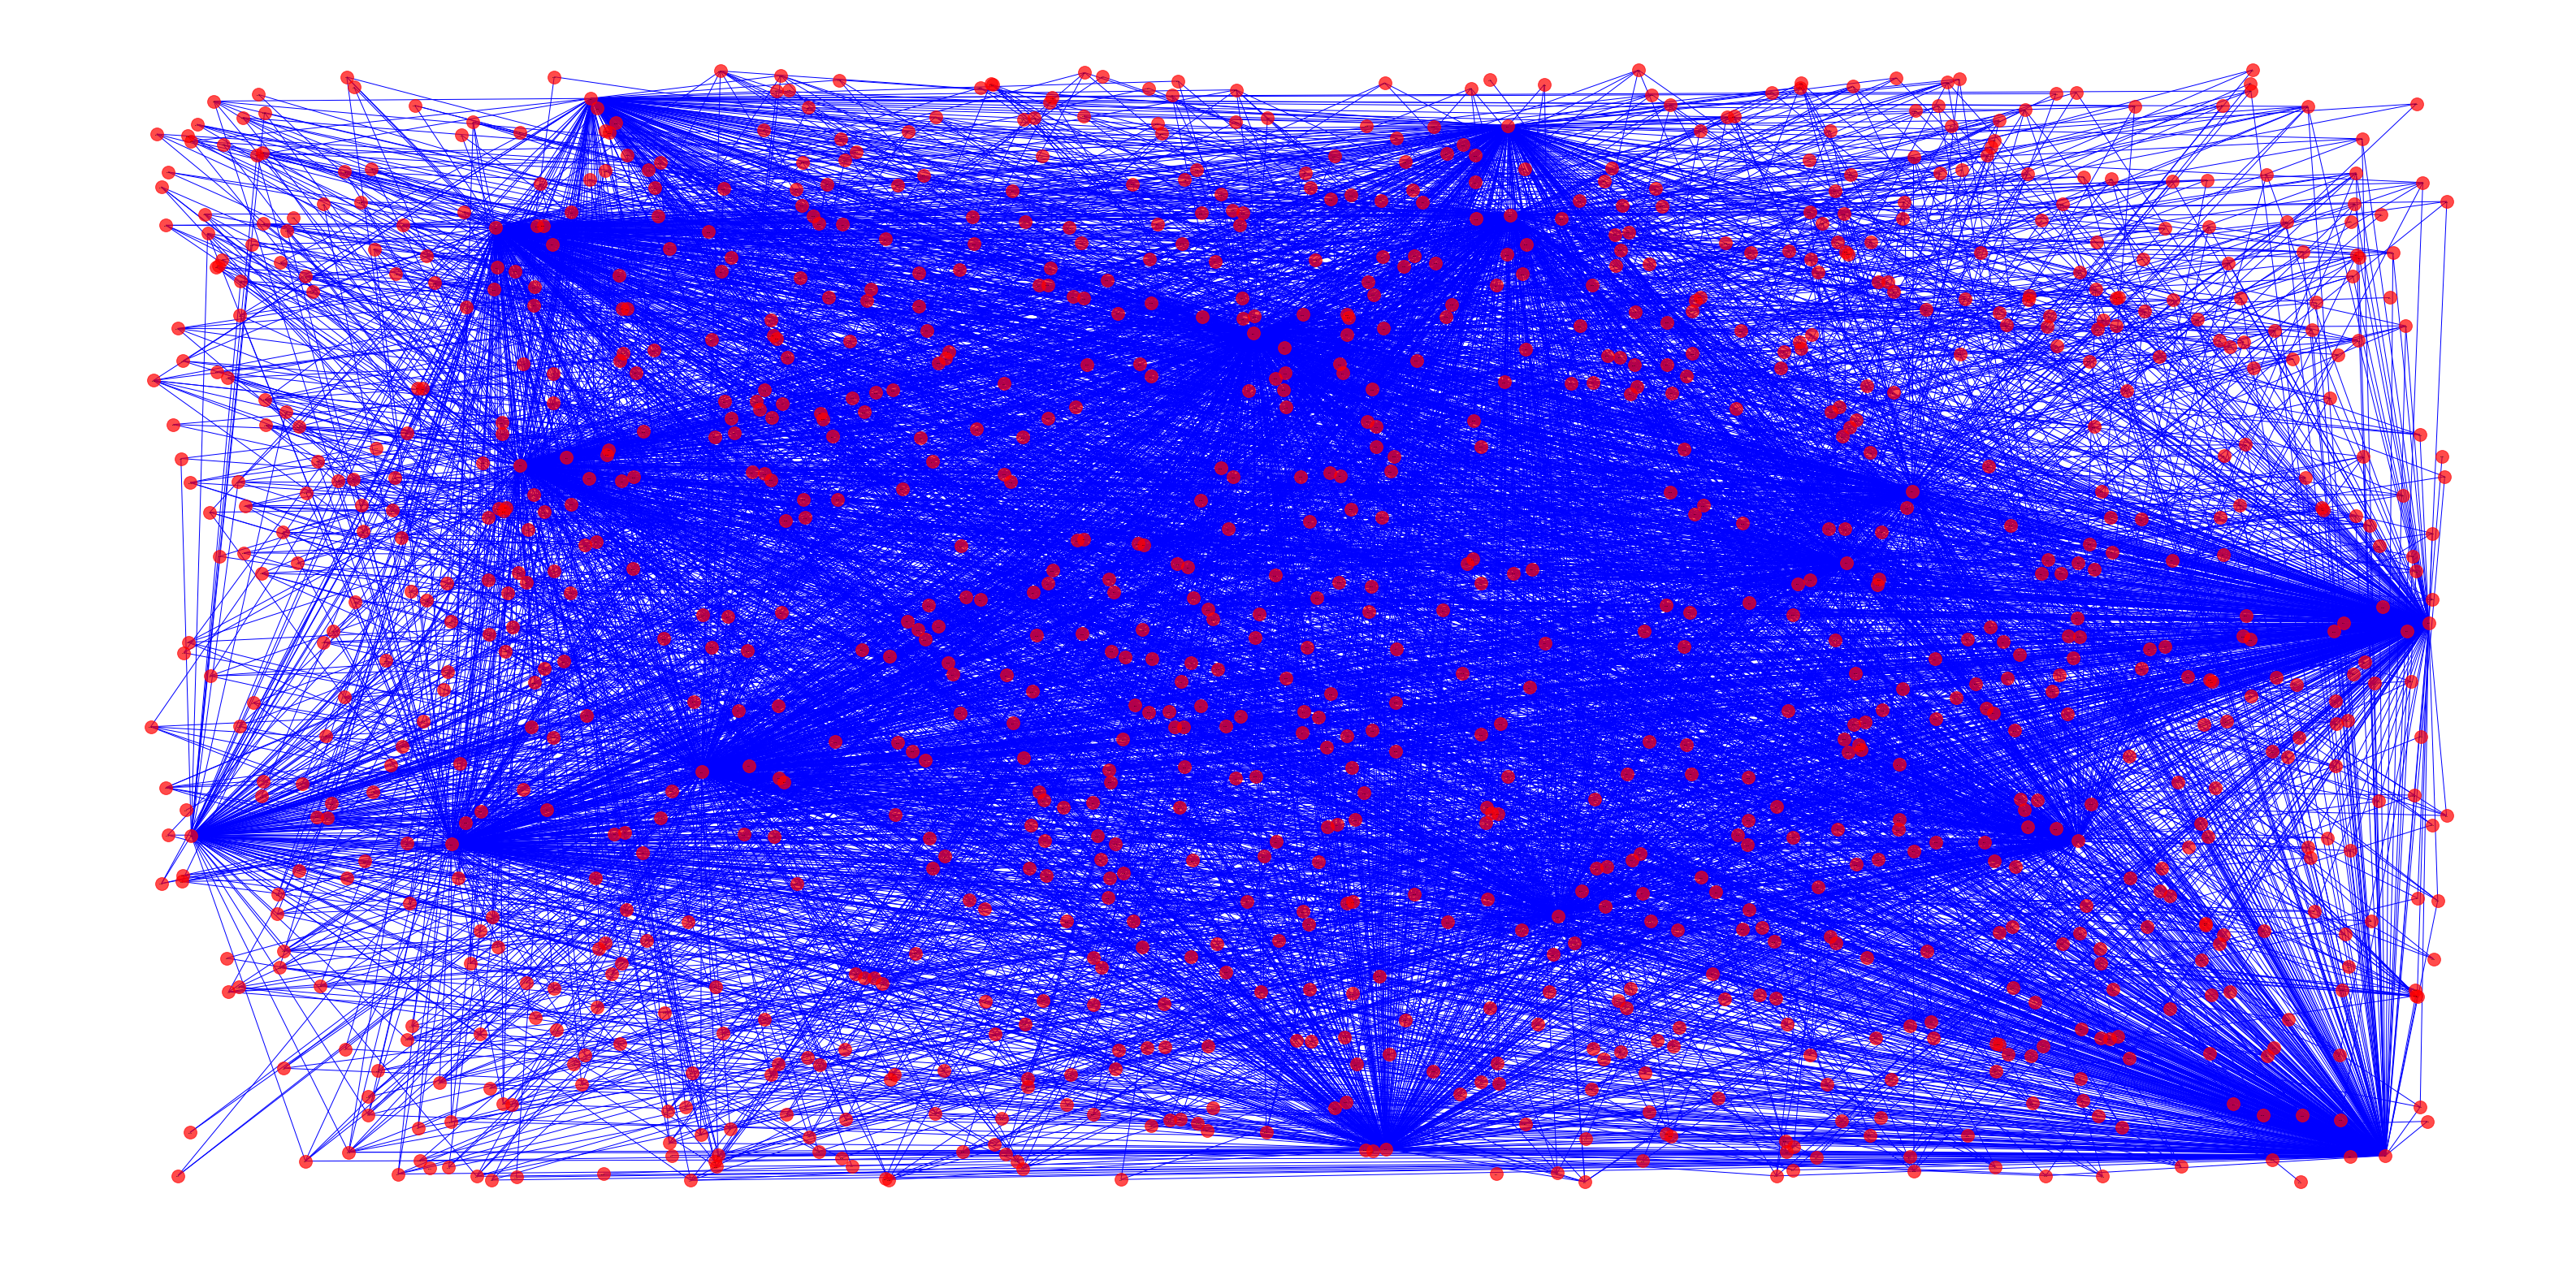

In [14]:
# nodes
nx.draw_networkx_nodes(G,pos,node_size=250, alpha=0.7, with_labels=False, edge_color='0.4')

# edges
nx.draw_networkx_edges(G, pos, edgelist=e,edge_color='b',
                       width=1)
# labels
nx.draw_networkx_labels(G, pos, font_size=2, font_family='sans-serif')

plt.axis('off')
plt.show()

In [15]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(G,weight=None)
c

ImportError: cannot import name greedy_modularity_communities

In [26]:
nx.__version__

'2.1'

In [19]:
G_bee = nx.Graph() #initialize the graph
for index, row in data.iterrows():
    #print(row[0],row[1],row[2])
    G_bee.add_edge(row[0],row[1]) #add node1,node2,weight list iteratively to the graph
    


In [21]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G_bee,weight=None))
c

[frozenset({219,
            242,
            256,
            257,
            258,
            262,
            263,
            264,
            265,
            267,
            272,
            276,
            280,
            286,
            288,
            290,
            293,
            296,
            298,
            299,
            301,
            314,
            315,
            329,
            336,
            337,
            338,
            344,
            345,
            347,
            349,
            351,
            361,
            370,
            372,
            376,
            384,
            391,
            393,
            394,
            404,
            406,
            417,
            422,
            429,
            433,
            438,
            439,
            444,
            449,
            454,
            456,
            457,
            462,
            466,
            470,
            474,
            481,
            48

In [24]:
print(len(c[0]))
print(len(c[1]))
print(len(c[2]))

580
564
20


In [ ]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(G, k))

### Centrality

In [15]:
deg_centrality = nx.degree_centrality(G)
deg_centrality

{201: 0.40240756663800514,
 219: 0.2897678417884781,
 242: 0.3757523645743766,
 255: 0.19690455717970765,
 259: 0.3473774720550301,
 262: 0.4316423043852107,
 263: 0.27773000859845226,
 264: 0.3886500429922614,
 267: 0.411006018916595,
 268: 0.3929492691315563,
 271: 0.3757523645743766,
 272: 0.3998280309544282,
 275: 0.3860705073086844,
 277: 0.3404987102321582,
 279: 0.38435081685296646,
 280: 0.2545141874462597,
 288: 0.4067067927773001,
 289: 0.2536543422184007,
 301: 0.294926913155632,
 315: 0.33963886500429924,
 332: 0.4935511607910576,
 334: 0.3276010318142734,
 335: 0.4170249355116079,
 336: 0.30266552020636284,
 338: 0.4032674118658642,
 340: 0.2536543422184007,
 342: 0.2553740326741187,
 344: 0.3654342218400688,
 347: 0.5021496130696474,
 351: 0.3619948409286329,
 355: 0.22012037833190026,
 357: 0.24333619948409288,
 360: 0.38005159071367156,
 361: 0.3250214961306965,
 363: 0.3009458297506449,
 370: 0.3404987102321582,
 376: 0.3946689595872743,
 380: 0.31900257953568356,
 382

In [16]:
d = sorted(deg_centrality.items(), key=lambda x: x[1],reverse=True) #sort the nodes according to the the deg. centrality values
values = [x[1] for x in d]

max_slope = 0
max_index = 0
for i in range(1,len(d)-1):
    
    slope = d[i][1] - d[i+1][1]
    if slope >= max_slope:
        max_slope = slope
        max_index = i
    #print(d[i][1] - d[i+1][1])

print(max_slope)
print(values[max_index])   

0.018916595012897663
0.5270851246775581


In [17]:
starting_nodes = []
for item in d:
    if item[1] > 0.45:
        starting_nodes.append(item[0])
        print(item[0],item[1])

1543 0.5967325881341359
1667 0.5546001719690455
1671 0.5485812553740327
1484 0.5365434221840069
959 0.532244196044712
880 0.529664660361135
918 0.5270851246775581
1764 0.5081685296646604
1966 0.5073086844368014
1854 0.5047291487532244
347 0.5021496130696474
1721 0.5012897678417885
1999 0.5012897678417885
1047 0.49871023215821153
1533 0.49699054170249357
1697 0.4961306964746346
332 0.4935511607910576
945 0.49097162510748066
1562 0.4892519346517627
712 0.48753224419604474
949 0.48667239896818576
724 0.4823731728288908
1851 0.4823731728288908
1855 0.47979363714531387
1973 0.4789337919174549
1630 0.47377472055030095
935 0.472055030094583
1015 0.471195184866724
1665 0.471195184866724
733 0.46775580395528804
578 0.4651762682717111
738 0.46345657781599314
1590 0.4591573516766982
623 0.4582975064488392
1294 0.4582975064488392
713 0.4582975064488392
761 0.4582975064488392
937 0.45743766122098023
246 0.45571797076526227
1869 0.45313843508168533
495 0.4522785898538263
1784 0.45055889939810834


In [51]:
starting_nodes #this is the list of starting nodes we'll start the cascades with based on deg. centrality

[1543,
 1667,
 1671,
 1484,
 959,
 880,
 918,
 1764,
 1966,
 1854,
 347,
 1721,
 1999,
 1047,
 1533,
 1697,
 332,
 945,
 1562,
 712,
 949,
 724,
 1851,
 1855,
 1973,
 1630,
 935,
 1015,
 1665,
 733,
 578,
 738,
 1590,
 623,
 713,
 761,
 1294,
 937,
 246,
 1869,
 495,
 1784]

In [53]:
cascade_complete_list = []
for node in starting_nodes:
    infect_list = [] #lsit of all nodes getting infected in the cascade
    G = nx.Graph() #initialize the graph for every node
    for index, row in data.iterrows():
        #print(row[0],row[1],row[2])
        G.add_edge(row[0],row[1], weight = row[2]) #add node1,node2,weight list iteratively to the graph
        
    infect_list.append(node) #append the starting node
    c = 0 #the number of empty list
    while(True):
        neighbors_list = list(G.neighbors(infect_list[-1]))
        #list_of_weights = []
        max_n = 0 #stores the max of all edge weights in neighbors list
        node_num = 0 #stores the node num having the max edge weight
        
        for n in neighbors_list: #iterate through the neighbors
            if not G[node][n]['weight']:
                c+=1 #increase number of empty list by one
                
            print(G[node][n]['weight']) 
            #list_of_weights.append(max(G[node][n]['weight']))
            if max_n <= max(G[node][n]['weight']):
                node_num = n
                max_n = max(G[node][n]['weight'])
            #neibors_list.pop(max_n)
        if c == len(neighbors_list):
            break
    
        infect_list.append(node_num)
    cascade_complete_list.append(infect_list)
    

[3.0, 6.0, 3.0, 2.0]
[2.0]
[3.0]
[2.0]
[25.0, 2.0, 2.0]
[2.0]
[32.999, 2.999, 8.0, 4.0, 3.0, 10.0, 6.0, 2.0]
[4.0]
[43.0]
[12.0, 6.0]
[2.0]
[2.0, 10.0, 7.0]
[2.0, 6.0, 5.0]
[3.0, 2.0, 2.0]
[2.0]
[2.0, 2.0]
[3.0, 8.0, 4.0, 6.0]
[2.0]
[3.0]
[2.0, 4.0]
[8.0, 2.0, 4.0]
[2.0, 2.0, 2.0]
[2.0, 7.0]
[3.0]
[4.0, 6.0]
[5.0]
[3.0]
[2.0]
[2.0]
[3.0]
[3.0, 4.0]
[4.999, 3.0, 3.0]
[65.999, 4.0, 3.0]
[36.999]
[3.0]
[2.0, 4.0, 32.0]
[5.0, 2.0, 14.0]
[8.0, 5.999, 3.0, 6.0, 3.0, 2.0]
[2.0]
[1.999, 2.0, 2.0]
[3.0]
[4.0]
[8.0]
[10.0, 3.0, 3.0, 6.0, 3.0]
[2.0]
[7.999]
[4.0, 3.0, 2.0]
[7.0]
[3.0, 2.0]
[2.0]
[7.0, 4.0, 2.0, 3.0]
[2.0, 4.0]
[2.0]
[6.0, 8.0, 2.0]
[2.999, 3.0, 5.0, 4.0]
[2.0]
[2.0]
[3.0, 3.0]
[9.0]
[11.999, 2.0]
[5.0, 14.0]
[4.0]
[18.0]
[3.0, 16.0, 5.0]
[10.0]
[2.0]
[3.0]
[3.0]
[8.0, 4.0]
[6.0, 14.999]
[20.999]
[2.999]
[3.0, 2.0]
[6.0]
[2.0, 6.0]
[9.0]
[2.0, 3.0]
[5.0, 2.0]
[3.0, 2.0, 13.0]
[2.0]
[4.0, 3.0, 4.0]
[16.999, 2.999, 3.0, 2.0, 2.0]
[17.0, 3.0, 3.0, 3.0]
[12.0]
[3.0, 2.0, 2.0, 26.0]
[4

[8.0, 2.0, 3.0, 3.0, 4.0]
[2.0, 4.0, 2.0, 3.0]
[13.0]
[7.0]
[35.999]
[2.0, 2.0, 34.999, 92.998, 16.0, 31.999, 34.999]
[4.0, 12.0]
[4.999]
[2.0]
[3.0]
[3.0]
[2.0]
[30.0, 3.999]
[2.0, 2.0]
[2.0]
[5.0, 3.0, 5.999, 27.0]
[3.0]
[2.0, 4.0]
[2.0, 3.0]
[3.0]
[15.0, 7.0, 3.0, 4.0]
[3.0]
[2.0, 4.0, 1.999, 3.0, 3.0]
[1.999]
[2.0, 2.0]
[4.999]
[2.0]
[6.0, 7.999]
[2.0, 4.0]
[6.0]
[3.0, 11.999]
[2.0, 28.0, 2.0]
[12.0]
[2.0, 2.0, 4.0, 4.0]
[4.999, 17.0, 9.0]
[102.998]
[9.0, 2.0]
[2.0, 5.0]
[2.0, 2.0]
[2.0, 2.0]
[2.0]
[10.0]
[5.0]
[3.0]
[4.0, 6.0]
[7.0, 2.0]
[2.0, 6.0, 14.0]
[7.0, 2.0, 2.0]
[3.0]
[28.999]
[4.0]
[3.0, 4.0]
[2.0]
[6.0]
[3.999]
[2.0, 9.999, 3.0, 2.0]
[2.999]
[8.0]
[6.0]
[2.0, 5.0]
[3.999]
[11.0, 2.0]
[5.0]
[5.0, 8.999]
[5.0]
[7.0]
[2.0]
[3.0, 4.0]
[8.0]
[1.999, 2.0, 34.0, 4.0, 2.0, 4.0]
[87.998]
[5.0]
[10.0, 3.0]
[6.0, 2.0]
[3.0, 2.0]
[8.0]
[2.0]
[4.0]
[8.0, 3.0, 9.999]
[2.0]
[9.0, 5.0, 2.0, 4.0]
[2.0, 4.0, 2.0, 5.0]
[2.0, 7.0]
[9.0]
[2.001]
[2.0]
[3.0, 3.0, 3.0]
[3.0, 13.0]
[2.0, 6.0, 2

[5.0]
[2.0]
[2.0]
[31.0]
[4.0]
[6.0, 3.0]
[2.0]
[3.0, 1.999]
[2.0]
[7.0, 2.0]
[9.0, 3.0]
[2.0]
[2.0]
[2.0]
[2.0]
[2.0, 20.999, 3.0]
[2.0]
[2.0, 5.0]
[2.0]
[6.0]
[3.0, 2.0]
[2.0]
[8.0]
[2.0, 8.999]
[2.0, 2.0, 2.0]
[4.0]
[8.0]
[5.0]
[7.0, 4.0, 5.0]
[3.999, 2.0, 2.0, 5.0]
[28.999]
[5.0]
[7.0]
[4.0]
[2.0, 9.999, 2.0, 3.0, 6.0, 7.0]
[6.0, 7.0]
[3.0]
[3.0, 4.999, 8.0]
[5.0, 5.0]
[15.0]
[3.0]
[13.0]
[5.0]
[2.0]
[2.0]
[3.0, 4.0, 7.999]
[1.999, 3.0]
[2.0]
[6.0, 12.0, 14.0, 7.0]
[4.0]
[2.0, 2.0]
[10.0, 5.0]
[29.999, 2.0, 5.0]
[3.0]
[5.0, 2.0]
[2.0]
[7.0, 2.0, 11.0]
[3.0, 8.0, 6.0]
[8.999, 8.0, 19.0]
[4.0]
[1.999]
[4.0]
[3.0, 4.0]
[3.0, 2.0]
[2.0, 4.0]
[6.999]
[2.0]
[4.0, 8.0]
[2.999, 1.999, 2.0]
[3.0]
[8.999, 2.0]
[3.999, 4.0]
[8.0, 3.0, 8.0]
[3.0]
[2.0]
[2.0, 23.0]
[3.0]
[3.0]
[3.0]
[8.0]
[2.0]
[4.0, 6.0, 3.0]
[3.0, 2.0]
[2.0, 4.0]
[2.0, 2.0]
[10.999, 9.0, 2.0, 2.0, 2.0]
[6.0]
[8.0, 3.0, 6.0]
[4.0]
[4.999]
[2.0]
[2.999, 2.0]
[2.0]
[2.0, 2.999]
[2.999]
[56.999]
[2.0, 2.0, 3.0, 4.0, 5.0]
[2.0]
[7

KeyboardInterrupt: 

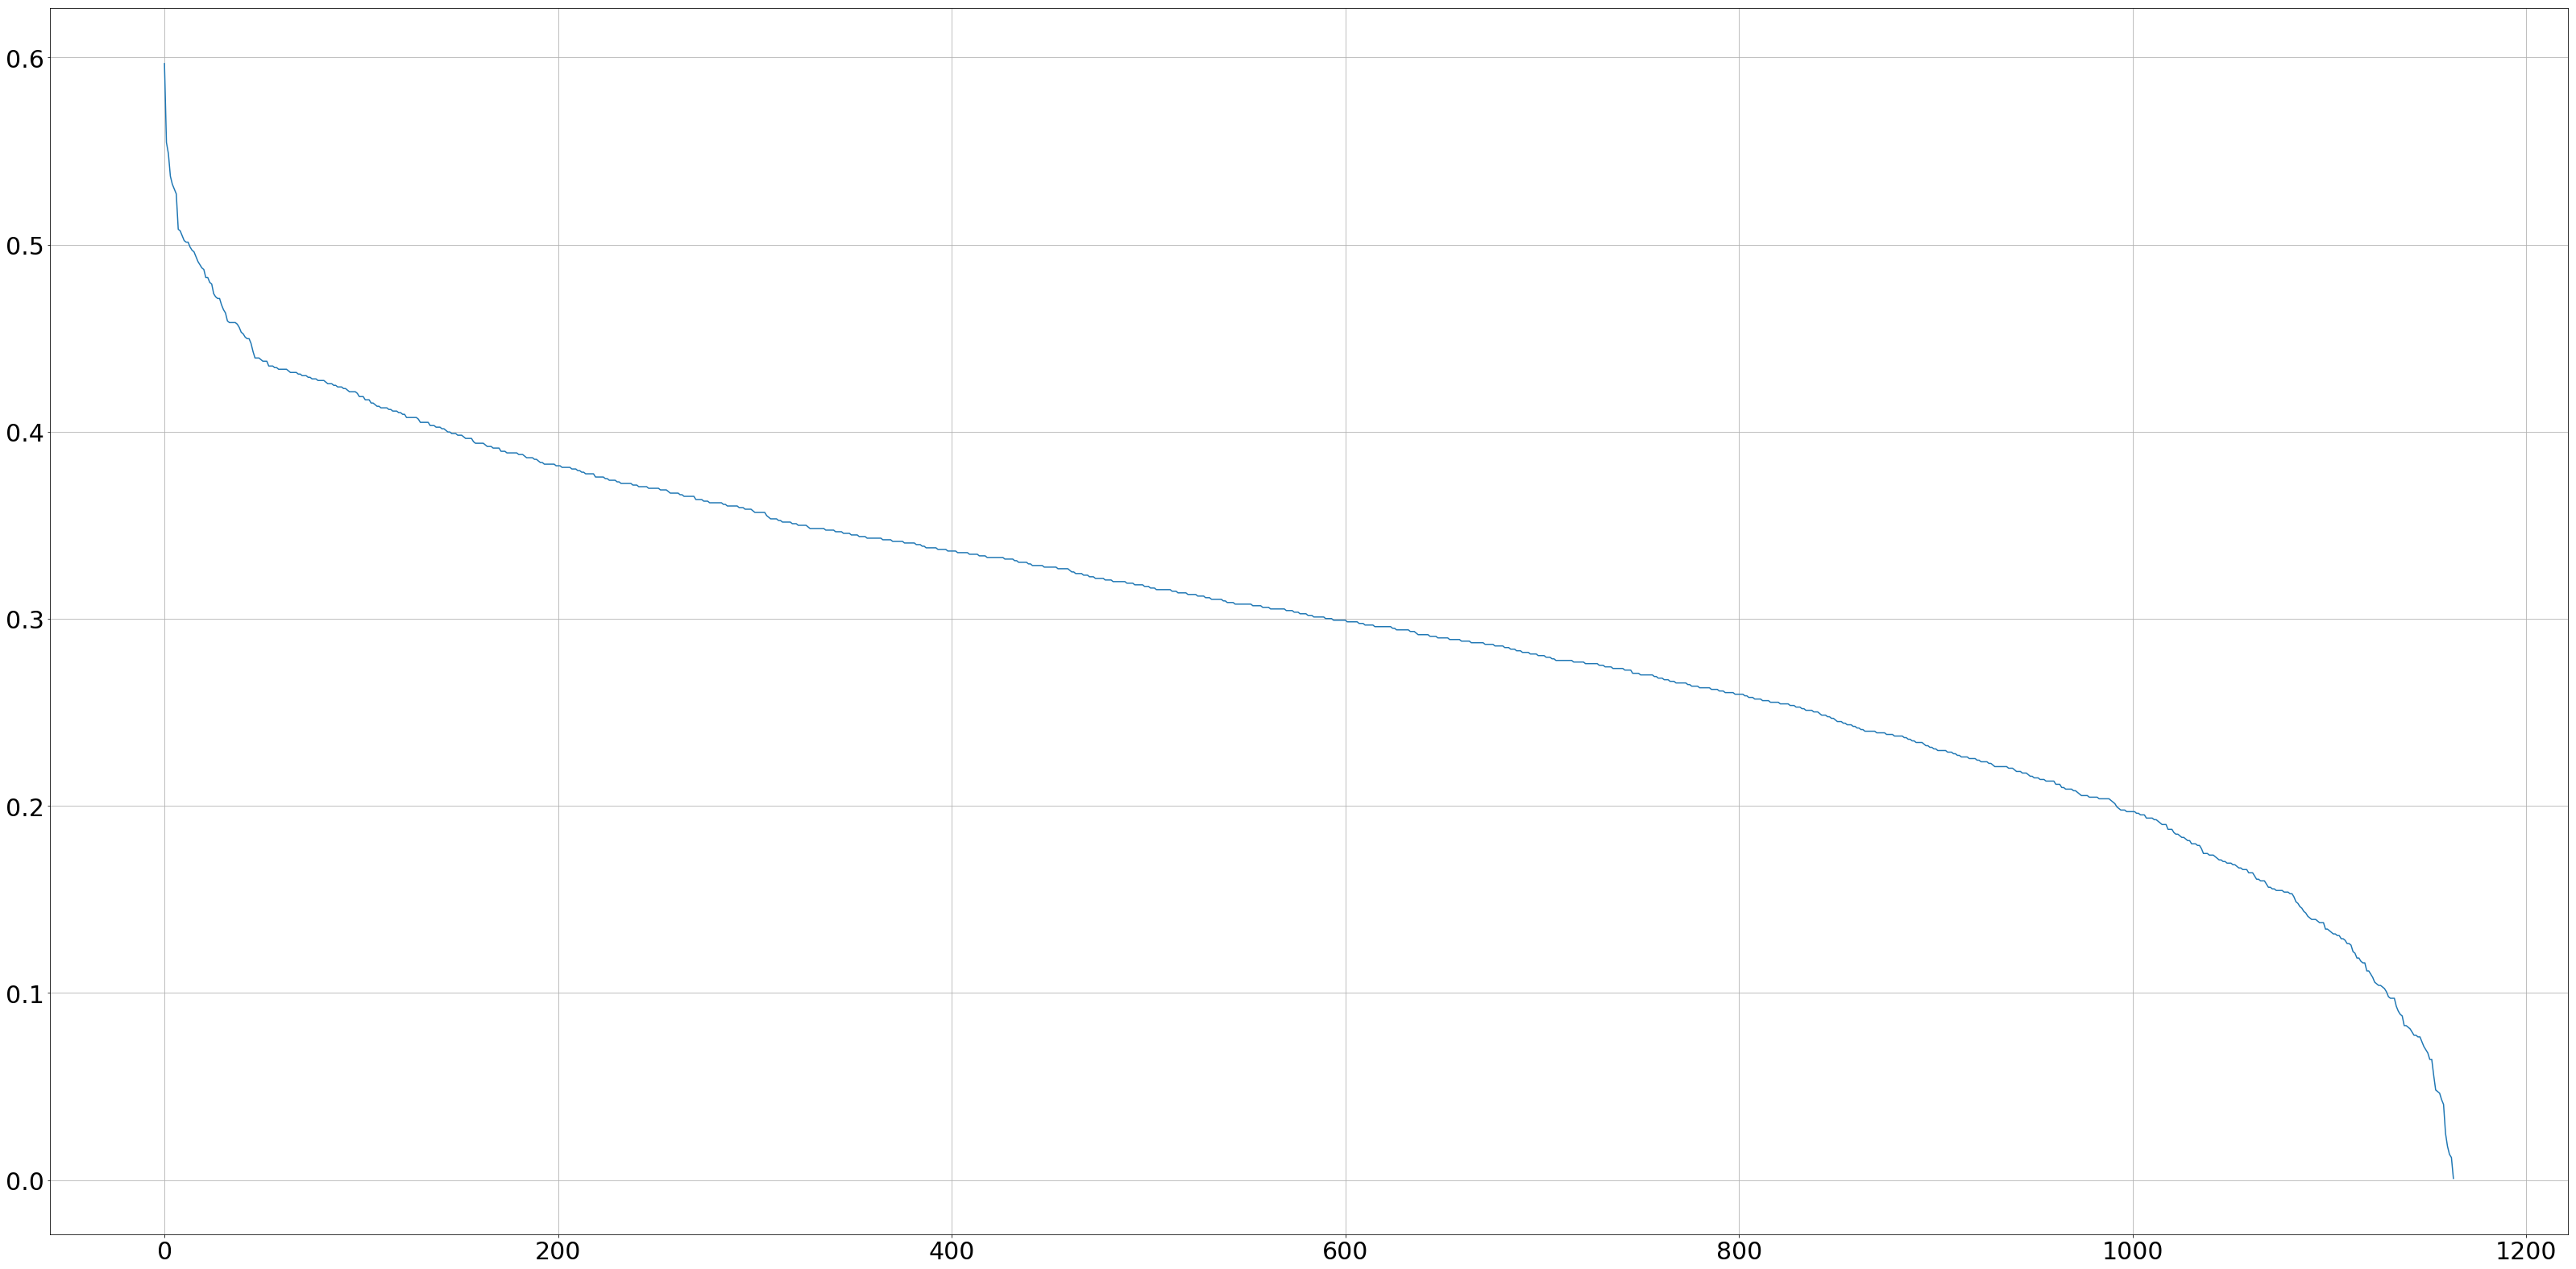

In [42]:
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=30)     
matplotlib.rc('ytick', labelsize=30)
plt.plot(values)

In [31]:
deg_centrality[679]


0.0008598452278589854

In [32]:
deg_centrality[1534]

0.012037833190025795

#### SI Model implemented below

In [24]:
deg_centrality

{201: 0.40240756663800514,
 207: 0.3009458297506449,
 218: 0.1410146173688736,
 219: 0.2897678417884781,
 236: 0.1874462596732588,
 241: 0.1599312123817713,
 242: 0.3757523645743766,
 243: 0.3000859845227859,
 245: 0.2880481513327601,
 246: 0.45571797076526227,
 249: 0.16595012897678418,
 252: 0.24419604471195186,
 255: 0.19690455717970765,
 256: 0.3104041272570937,
 257: 0.2648323301805675,
 258: 0.43938091143594155,
 259: 0.3473774720550301,
 262: 0.4316423043852107,
 263: 0.27773000859845226,
 264: 0.3886500429922614,
 265: 0.2656921754084265,
 266: 0.16079105760963028,
 267: 0.411006018916595,
 268: 0.3929492691315563,
 271: 0.3757523645743766,
 272: 0.3998280309544282,
 273: 0.30868443680137575,
 275: 0.3860705073086844,
 276: 0.26397248495270853,
 277: 0.3404987102321582,
 278: 0.36027515047291486,
 279: 0.38435081685296646,
 280: 0.2545141874462597,
 282: 0.3826311263972485,
 283: 0.37403267411865865,
 284: 0.37317282889079967,
 285: 0.20980223559759245,
 286: 0.2261392949269131

In [17]:


p = [0.1]
node_list = list(G.nodes())
cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = []
        first = random.choice(node_list) #the first infected node
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
        node_list.remove(first)
        #print(node_list)
        cascade_list.append(infect_list)


In [18]:
print(len(cascade_list))

1164


In [48]:
print(len(list(G.nodes)))

1164


In [51]:
p = [0.1]
node_list = list(G.nodes())
cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = [] #the nodes infected by first node
        first = random.choice(node_list) #the first infected node
        node_list.remove(first)
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
                                node_list.remove(potential_node)
        
        #print(node_list)
        cascade_list.append(infect_list)

ValueError: list.remove(x): x not in list